## Objective: Practice the use of a Decision Tree model for classification


Noah Caulfield <br/>
4/11/2024 <br/>
CS 461 <br/>
HW5_Classification_Customer_Churn_Prediction<br/>

### Import the libraries

In [145]:
"""
Import the following libraries:
- pandas
- numpy
- matplotlib

- sklearn Train and Test Split
- sklearn Tree
- sklearn Decision Tree Classifier
- sklearn Accuracy score

- the graphviz library
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import graphviz



### Read the data in

- There are two files, one for training and one for testing. However, the test.csv file does not have the classes to be predicted. Therefore, we are not going to use that file.

- The path will depend on your Drive

In [146]:
# Create a df_train DataFrame for the train data


In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd

# Load the CSV file into a DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')

# Display the DataFrame to confirm it's loaded correctly
#print(df_train)


In [149]:
# print the first 5 rows of df_train
import pandas as pd

# Assuming df_train is already loaded with data from the CSV file
# Display the first 5 rows of the DataFrame
df_train.head()



,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [150]:
# Show the description of df_train

import pandas as pd

# Assuming df_train is already loaded with data from the CSV file
# Display descriptive statistics of the DataFrame
df_train.describe()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


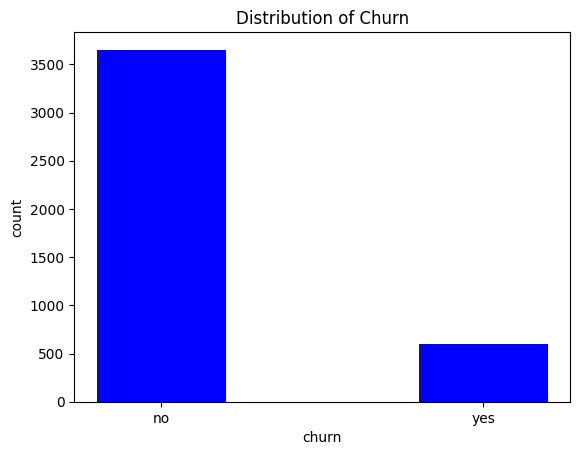

In [182]:
import matplotlib.pyplot as plt


churn_counts = df_train['churn'].value_counts()


plt.bar(churn_counts.index, churn_counts.values, width=0.4, color='blue')  # Set width to 0.4 (half of the default width which is like 0.8)

# Add labels and title
plt.xlabel('churn')
plt.ylabel('count')
plt.title('Distribution of Churn')

# Show the plot
plt.show()



#### The classes are really imbalanced. You can take care of that later.

### Let's get our Xs and ys

In [183]:
# Assuming 'churn' is the target variable and is of type categorical (string or integer labels)
# Create the feature matrix X by dropping the target column 'churn'
X = df_train.drop('churn', axis=1)

# Create the target vector y by selecting only the target column 'churn'
y = df_train['churn']

In [154]:
# Show the first five rows of X
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [155]:
# Show the size of X
X.shape

(4250, 19)

### Before we continue. We need to address an issue with our data.

Decision Trees should handle numerical and catergorical data. However, the scikit-learn implementation does not support categorical variables for now.
https://scikit-learn.org/stable/modules/tree.html

Then, we need to handle this issue.


### Let's use the `get_dummies` method from Pandas to get the one-hot-encoder for these variables

In [156]:
# Get a new dataset as result of the get_dummies method applied to the
# categorical variables 'state','area_code','international_plan','voice_mail_plan'
# similarly, use the parameter drop_first=True.
# this parameter is used to avoid multicollinearity, a situation where one
#predictor variable in a regression model can be predicted from the others.

import pandas as pd
# Display the first five rows of the df_train_encoded DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
# Define the categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
dummy_columns = [col for col in df_train_encoded.columns if 'state_' in col or 'area_code_' in col or 'international_plan_' in col or 'voice_mail_plan_' in col]
df_train_encoded_filtered = df_train_encoded[dummy_columns]
df_train_encoded_filtered = df_train_encoded_filtered.astype(int)
df_train_encoded_filtered.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [157]:
# Show the first 5 rows for this new dataset


In [158]:
# Show the new size of the new X
X = df_train_encoded_filtered
print( X.shape)

(4250, 54)


### We have a new DataFrame with numeric values instead of categorical values. However, we need to join this new DataFrame with the original data containing the non-categorical columns.

In [159]:
# From our original DataFrame we need to remove the original categorical columns

import pandas as pd
# Display the first five rows of the df_train_encoded DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')



# Define the categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

df_final_no_churn = df_final.drop(columns='churn')



In [160]:

df_final_no_churn.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,0,0,0,0,1


In [161]:

categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

df_train_non_categorical = df_train.drop(columns=categorical_cols)

# Store the column names from the previous DataFrame, you will use them later
column_names = df_train_non_categorical.columns
print(column_names)


Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [162]:
# Store the column names from the previous dataframe, you will use them later

# print the column names


In [163]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

df_train_dummies = pd.get_dummies(df_train[categorical_cols[:-1]], drop_first=True)
df_train_non_categorical = df_train.drop(columns=categorical_cols)
final_df = df_train_non_categorical.join(df_train_dummies)




In [164]:
# Display the first five rows of the DataFrame
final_df.head()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,False,False,False,False,False,False,True,False,False,True
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,False,False,False,False,False,False,True,False,False,False
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,False,False,False,False,False,False,False,False,True,False
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,False,False,False,False,False,False,True,False,True,False
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,False,False,False,False,False,False,False,True,False,True


#### Wow! we have more columns. But all numerica now.

In [165]:
# Split this dataframe into train and test sets.
# Use a 80/20 split ratio and a random state of 42
# Define the categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
df_train_non_categorical = df_train.drop(columns=categorical_cols)

df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_train_encoded = df_train_encoded[df_train_encoded.columns.difference(df_train_non_categorical.columns)]

df_final = df_train_non_categorical.join(df_train_encoded)
boolean_columns = df_final.select_dtypes(include=['bool']).columns
if not boolean_columns.empty:
    df_final[boolean_columns] = df_final[boolean_columns].astype(int)

#df_final.head()

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df_final.drop('churn', axis=1)
y = df_final['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust parameters as needed




In [209]:
# Print the sizes of the datasets
#print("Size of X_train:", X_train.shape)
#print("Size of y_train:", y_train.shape)
#print("Size of X_test:", X_test.shape)
#print("Size of y_test:", y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3400, 69)
(3400,)
(850, 69)
(850,)


### Create a base Decision Tree Classifier.


In [168]:
# Create a base Decision Tree classifier, use the random state of 42 as parameter
from sklearn.tree import DecisionTreeClassifier
#random state
dt_classifier = DecisionTreeClassifier(random_state=42)
# show the classifier
display(dt_classifier)

DecisionTreeClassifier(random_state=42)

In [210]:


display(dt_classifier)
# Train the model using X_train and y_train
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

#print(dt_classifier)




DecisionTreeClassifier(random_state=42)

In [211]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display

# Initialize the Decision Tree classifier with a specific random state
dt_classifier = DecisionTreeClassifier(random_state=42)




In [212]:

display(dt_classifier)


DecisionTreeClassifier(random_state=42)

### Train the classifier using the training data

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from IPython.display import display

# Load an example dataset (replace this with your actual data)
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with a specific random state
dt_classifier = DecisionTreeClassifier(random_state=42)







In [213]:
# Train the model using X_train and y_train
# Train the model using X_train and y_train
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Make predictions on our Test data

In [214]:
from sklearn.metrics import accuracy_score

dt_classifier_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier_depth_5.fit(X_train, y_train)

y_pred_depth_5 = dt_classifier_depth_5.predict(X_test)


test_accuracy_depth_5 = accuracy_score(y_test, y_pred_depth_5)
print("Accuracy:", test_accuracy_depth_5)


Accuracy: 0.9235294117647059


## Let's try to improve our model

One of the main causes of overfitting decision tree is depth of the tree. Decision trees can overfit the data when they grow too deep and capture too many details. To prevent this, we can use the max-depth hyperparameter of DecisionTreeClassifier to limit the depth of the tree.

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the Decision Tree classifier with the specified parameters
dt_classifier_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the classifier
dt_classifier_depth_5.fit(X_train, y_train)

# Predict on the test data
y_pred_depth_5 = dt_classifier_depth_5.predict(X_test)

# Calculate the accuracy score
test_accuracy_depth_5 = accuracy_score(y_test, y_pred_depth_5)
print(f"Test score {test_accuracy_depth_5:.4f}")


Test score 0.9235


In [216]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Create a new Decision Tree classifier with a maximum depth of 5 and random state of 42
dt_classifier_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Print the Decision Tree classifier
display(dt_classifier_depth_5)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_classifier_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_classifier_depth_5.fit(X_train, y_train)
y_pred = dt_classifier_depth_5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.4f}")



Accuracy on test data: 0.9235


#### We improved our model!

Limiting the depth of the tree will decrease overfitting. When we set the depth of the tree to 5 in the above classifier.

### Let's try another change

The minimum number of samples a node must have before it can be split. It can be an integer or a float. To avoid overfitting, we should choose a value that is not too small.

In [ ]:
# Create a new DT classifier with depth = 10, min_samples_aplit= 30, and random state of 42
from sklearn.tree import DecisionTreeClassifier

# Create a new Decision Tree classifier with specified parameters
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=42)


In [134]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=42)

display(dt_classifier)


DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=42)

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=42)
dt_classifier.fit(X_train, y_train)  # Training the classifier with the training data


y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score for the test data
print(f"Accuracy on test data: {accuracy:.4f}")



Accuracy on test data: 0.9329


### Nice! We improved it more.

### Let's try one more parameter

This parameter specifies the smallest number of samples that a leaf node can contain.

In [141]:
# Create a classifier with depth = 10, min_samples_split= 30,
# min_samples_leaf=2, and random state of 42

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=30, min_samples_leaf=2, random_state=42)
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=30,
                       random_state=42)

In [138]:
# Train the model using X_train and y_train
display(dt_classifier)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=30,
                       random_state=42)

In [139]:

y_pred = dt_classifier.predict(X_test)
#find testing score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score for the test data
print(f"Accuracy on test data: {accuracy:.4f}")



Accuracy on test data: 0.9376


### Did we improved it? Yes, no, the same?

If it didn't improve, what would you think you could do?

Yes it did!

- Do more data preprocessing (i.e., standardization)?
We could!

- Use grid search?
- play with other parameters? (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Let's visualize our tree

#### We can use the `graphviz` library to show our decision tree

https://graphviz.gitlab.io/

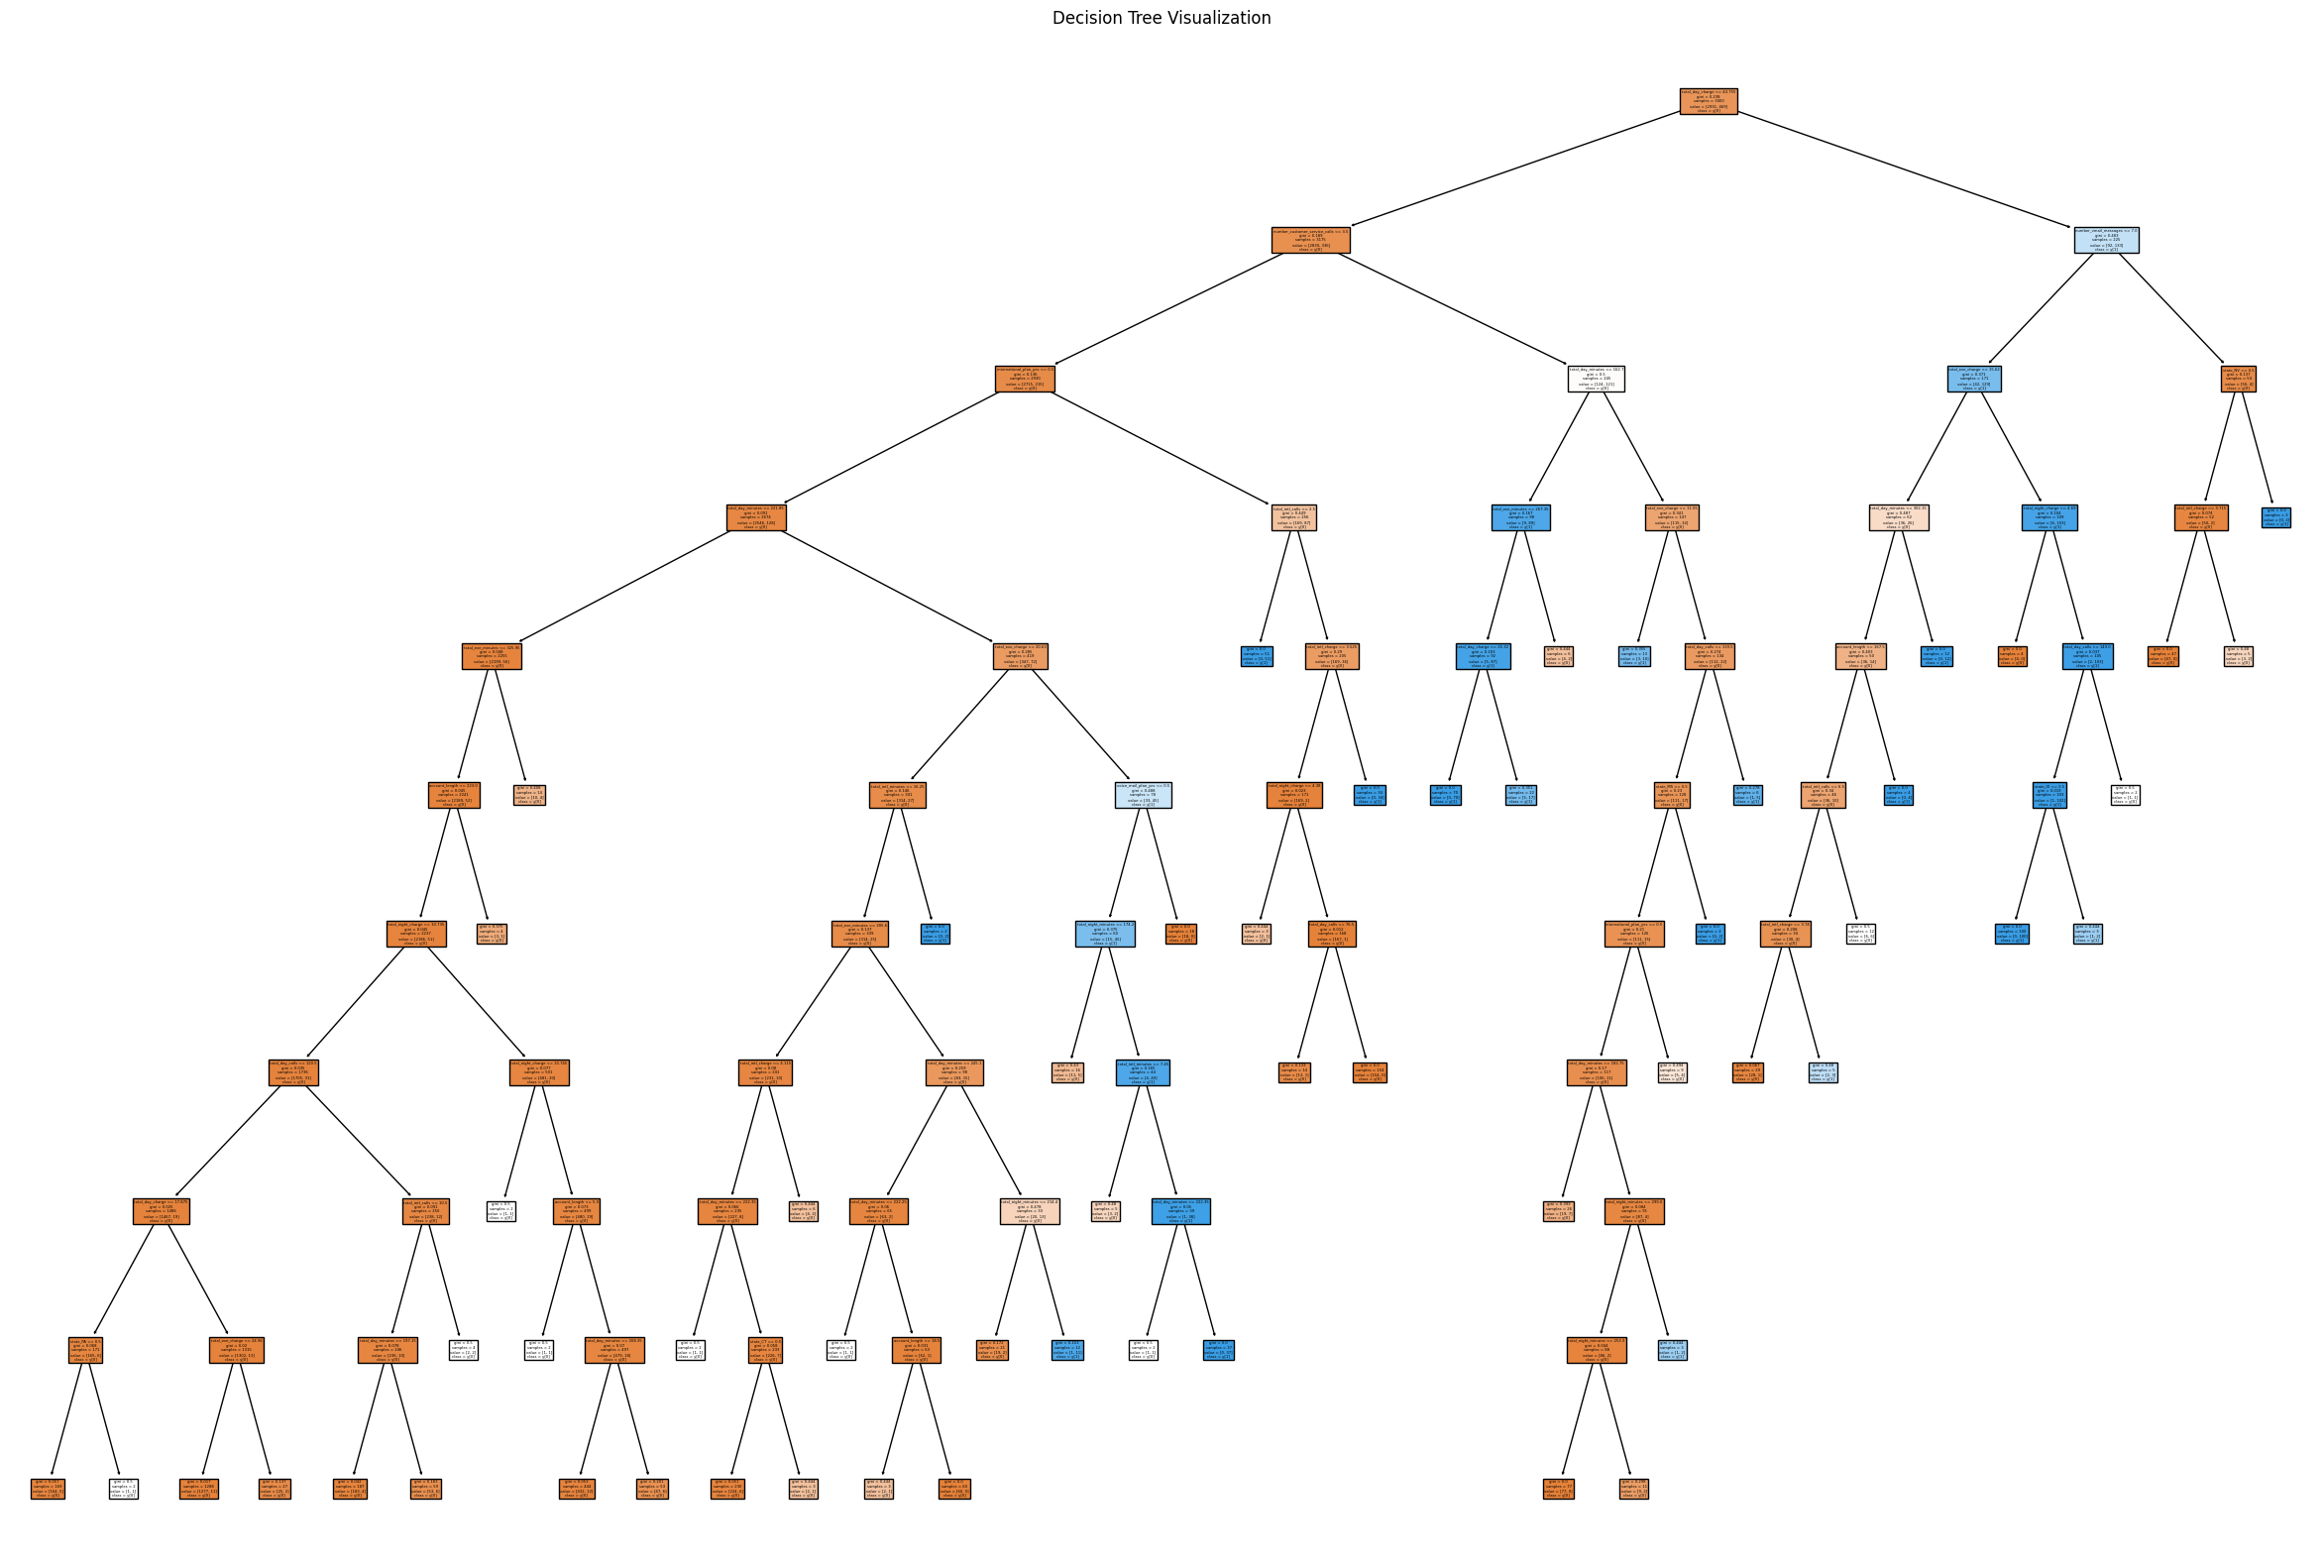

In [143]:

# Display the decision tree plot in Colab


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(30,20))  # Adjust the figure size as needed
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=True)
plt.title('Decision Tree Visualization')
plt.show()


In [144]:
# Export the plot to a PDF file
# For example: graph.render("decision_tree_plot", format="pdf")  # Export to PDF file

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X_train.columns,
                           class_names=True,
                           filled=True)

# Convert the DOT data to a graph
graph = graphviz.Source(dot_data)

# Export the graph to a PDF file
graph.render("decision_tree_plot", format="pdf")


'decision_tree_plot.pdf'

# We are done with this excercise